In [1]:
library(haven)
library(tidyverse)
library(broom)
library(lme4) 
library(latex2exp)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand



In [2]:
AA_Sex_1 <- read_sav("C:/Users/Personal/AA leche/datos/AMINOACIDOS POR SEXO_1.sav")
head(AA_Sex_1) 

ID,GROUP,MATERNALAGE,SEXO,INFANTDOB,MATBMI1COLL,MATBMI215d,MATBMI32mos,MATBMI44mos,BABYWeigth1g,...,ALAGLOB,ASNGLOB,SYSGLOB,GLYGLOB,GLUGLOB,GLNGLOB,PROLINEGLOB,SERINEGLOB,TYRAMINEGLOB,new
1,0,17,1,2009-08-20,25,24,24,22,3492.7,...,21.25,0.5,1.00,10.00,87.25,23.25,2.75,8.0,1.00,0
2,0,16,2,2009-08-24,32,31,30,29,3392.9,...,18.25,0.0,0.75,13.75,100.50,40.50,2.50,9.5,0.75,0
3,0,17,2,2009-08-21,23,23,NA,NA,2993.8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
4,0,16,2,2009-08-21,26,NA,NA,NA,3692.3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
5,0,16,NA,2009-08-29,25,NA,NA,NA,3592.5,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
6,0,16,2,2009-08-27,29,28,30,31,3093.5,...,15.50,0.5,1.50,10.25,74.75,30.00,5.25,8.0,2.00,0


In [3]:
names(AA_Sex_1)

[1] "ID"                       "GROUP"                   
  [3] "MATERNALAGE"              "SEXO"                    
  [5] "INFANTDOB"                "MATBMI1COLL"             
  [7] "MATBMI215d"               "MATBMI32mos"             
  [9] "MATBMI44mos"              "BABYWeigth1g"            
 [11] "BABYWeigth2g"             "BABYWeigth3g"            
 [13] "BABYWeigth4g"             "HeadCircumcm1"           
 [15] "HCcm2"                    "HCcm3"                   
 [17] "HCcm4"                    "MATHeight1m"             
 [19] "MATHeight2m"              "MATHeight3m"             
 [21] "MATHeight4m"              "MATWeight1kg"            
 [23] "MATWeight2kg"             "MATWeight3kg"            
 [25] "MATWeight4kg"             "A.TOTALCALORIESKcal"     
 [27] "B.TOTALCALORIESKcal"      "A.PROTEINg"              
 [29] "B.PROTEINg"               "A.CHOg"                  
 [31] "B.CHOg"                   "A.LIPIDSg"               
 [33] "B.LIPIDSg"                "A.GLUCOSEmgdL"           
 [35] "B.GLUCOSEmgdL"            "A.CHOLESTEROLmgdL"       
 [37] "B.CHOLESTEROLmgdL"        "A.TRIGLYCERIDSmgdL"      
 [39] "B.TRIGLYCERIDmgdL"        "A.HDLmgdL"               
 [41] "B.HDLmgdL"                "A.LDLmgdL"               
 [43] "B.LDLmgdL"                "A.PROTEINSgdL"           
 [45] "B.PROTEINSgdL"            "A.ALBUMINgdL"            
 [47] "B.ALBUMINgdL"             "edadr"                   
 [49] "Grupos"                   "CALOSTRUMtotalAA"        
 [51] "TRANSITIONtotalAA"        "MATURE2mtotalAA"         
 [53] "MATURE4mtotalAA"          "CALOSTRUMessentialAA"    
 [55] "TRANSITIONessentialAA"    "MATURE2messentialAA"     
 [57] "MATURE4messentialAA"      "ARGCalostrum"            
 [59] "ARGTransition"            "ARGMature2m"             
 [61] "ARGMature4m"              "HISCalostrum"            
 [63] "HISTransition"            "HISMature2m"             
 [65] "HISMature4m"              "ILECalostrum"            
 [67] "ILETransition"            "ILEMature2m"             
 [69] "ILEMature4m"              "LEUCalostrum"            
 [71] "LEUTransition"            "LEUMature2m"             
 [73] "LEUMature4m"              "LYSCalostrum"            
 [75] "LYSTransition"            "LYSMature2m"             
 [77] "LYSMature4m"              "METCalostrum"            
 [79] "METTransition"            "METMature2m"             
 [81] "METMature4m"              "PHECalostrum"            
 [83] "PHETransition"            "PHEMature2m"             
 [85] "PHEMature4m"              "THRCalostrum"            
 [87] "THRTransition"            "THRMature2m"             
 [89] "THRMature4m"              "TRPCalostrum"            
 [91] "TRPTransition"            "TRPMature2m"             
 [93] "TRPMature4m"              "VALCalostrum"            
 [95] "VALTransition"            "VALMature2m"             
 [97] "VALMature4m"              "CALOSTRUMnonessentialAA" 
 [99] "TRANSITIONnonessentialAA" "MATURE2mnonessentialAA"  
[101] "MATURE4mnonessentialAA"   "ASPCalostrum"            
[103] "ASPTransition"            "ASPMature2m"             
[105] "ASPMature4m"              "ALACalostrum"            
[107] "ALATransition"            "ALAMature2m"             
[109] "ALAMature4m"              "ASNCalostrum"            
[111] "ASNTransition"            "ASNMature2m"             
[113] "ASNMature4m"              "CYSCalostrum"            
[115] "CYSTransition"            "CYSMature2m"             
[117] "CYSMature4m"              "GLYCalostrum"            
[119] "GLYTransition"            "GLYMature2m"             
[121] "GLYMature4m"              "GLUCalostrum"            
[123] "GLUTransition"            "GLUMature2m"             
[125] "GLUMature4m"              "GLNCalostrum"            
[127] "GLNTransition"            "GLNMature2m"             
[129] "GLNMature4m"              "PROCalostrum"            
[131] "PROTransition"            "PROMature2m"             
[133] "PROMature4m"              "SERCalos

In [4]:
#str(AA_Sex_1)

In [5]:
print('Essential AA \n')
names(AA_Sex_1)[58]
names(AA_Sex_1)[97]

print('Prolyne \n')
names(AA_Sex_1)[130]
names(AA_Sex_1)[133]

print('Non essential AA \n')
names(AA_Sex_1)[102]
names(AA_Sex_1)[141]

[1] "Essential AA \n"


[1] "ARGCalostrum"

[1] "VALMature4m"

[1] "Prolyne \n"


[1] "PROCalostrum"

[1] "PROMature4m"

[1] "Non essential AA \n"


[1] "ASPCalostrum"

[1] "TYRMature4m"

In [6]:
AA_E <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 62:97) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 


names(AA_E)

Warning message:
"`as_dictionary()` is soft-deprecated as of rlang 0.3.0.
Please use `as_data_pronoun()` instead
This warning is displayed once per session."Warning message:
"`new_overscope()` is soft-deprecated as of rlang 0.2.0.
Please use `new_data_mask()` instead
This warning is displayed once per session."Warning message:
"The `parent` argument of `new_data_mask()` is deprecated.
The parent of the data mask is determined from either:

  * The `env` argument of `eval_tidy()`
  * Quosure environments when applicable
This warning is displayed once per session."Warning message:
"`overscope_clean()` is soft-deprecated as of rlang 0.2.0.
This warning is displayed once per session."

[1] "id"            "group"         "age"           "sex"          
 [5] "HISCalostrum"  "HISTransition" "HISMature2m"   "HISMature4m"  
 [9] "ILECalostrum"  "ILETransition" "ILEMature2m"   "ILEMature4m"  
[13] "LEUCalostrum"  "LEUTransition" "LEUMature2m"   "LEUMature4m"  
[17] "LYSCalostrum"  "LYSTransition" "LYSMature2m"   "LYSMature4m"  
[21] "METCalostrum"  "METTransition" "METMature2m"   "METMature4m"  
[25] "PHECalostrum"  "PHETransition" "PHEMature2m"   "PHEMature4m"  
[29] "THRCalostrum"  "THRTransition" "THRMature2m"   "THRMature4m"  
[33] "TRPCalostrum"  "TRPTransition" "TRPMature2m"   "TRPMature4m"  
[37] "VALCalostrum"  "VALTransition" "VALMature2m"   "VALMature4m"

In [7]:
AA_NE <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 58:61, 102:141) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 

names(AA_NE)

[1] "id"            "group"         "age"           "sex"          
 [5] "ARGCalostrum"  "ARGTransition" "ARGMature2m"   "ARGMature4m"  
 [9] "ASPCalostrum"  "ASPTransition" "ASPMature2m"   "ASPMature4m"  
[13] "ALACalostrum"  "ALATransition" "ALAMature2m"   "ALAMature4m"  
[17] "ASNCalostrum"  "ASNTransition" "ASNMature2m"   "ASNMature4m"  
[21] "CYSCalostrum"  "CYSTransition" "CYSMature2m"   "CYSMature4m"  
[25] "GLYCalostrum"  "GLYTransition" "GLYMature2m"   "GLYMature4m"  
[29] "GLUCalostrum"  "GLUTransition" "GLUMature2m"   "GLUMature4m"  
[33] "GLNCalostrum"  "GLNTransition" "GLNMature2m"   "GLNMature4m"  
[37] "PROCalostrum"  "PROTransition" "PROMature2m"   "PROMature4m"  
[41] "SERCalostrum"  "SERTransition" "SERMature2m"   "SERMature4m"  
[45] "TYRCalostrum"  "TYRTransition" "TYRMature2m"   "TYRMature4m"

In [8]:
# Removing NAs
AA_E_Long <- AA_E %>% gather(weekNames, level, 5:length(names(AA_E))) 
AA_NE_Long <- AA_NE %>% gather(weekNames, level, 5:length(names(AA_NE))) 

head(AA_E_Long)

Warning message:
"attributes are not identical across measure variables; they will be dropped"Warning message:
"attributes are not identical across measure variables; they will be dropped"

id,group,age,sex,weekNames,level
1,teen,17,girl,HISCalostrum,2
2,teen,16,boy,HISCalostrum,1
3,teen,17,boy,HISCalostrum,2
4,teen,16,boy,HISCalostrum,1
5,teen,16,NA,HISCalostrum,1
6,teen,16,boy,HISCalostrum,1


In [9]:
AA_E_Long <- 
    AA_E_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "4", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_E_Long <- 
    AA_E_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_E_Long)

id,group,age,sex,weekNames,level,week,AA
1,teen,17,girl,HISCalostrum,2,1,HIS
2,teen,16,boy,HISCalostrum,1,1,HIS
3,teen,17,boy,HISCalostrum,2,1,HIS
4,teen,16,boy,HISCalostrum,1,1,HIS
5,teen,16,NA,HISCalostrum,1,1,HIS
6,teen,16,boy,HISCalostrum,1,1,HIS


In [10]:
AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "4", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_NE_Long)

id,group,age,sex,weekNames,level,week,AA
1,teen,17,girl,ARGCalostrum,1,1,ARG
2,teen,16,boy,ARGCalostrum,1,1,ARG
3,teen,17,boy,ARGCalostrum,1,1,ARG
4,teen,16,boy,ARGCalostrum,1,1,ARG
5,teen,16,NA,ARGCalostrum,2,1,ARG
6,teen,16,boy,ARGCalostrum,2,1,ARG


In [11]:
AA_E_Long %>% filter(id == 4) %>% head()

id,group,age,sex,weekNames,level,week,AA
4,teen,16,boy,HISCalostrum,1,1,HIS
4,teen,16,boy,HISTransition,NA,2,HIS
4,teen,16,boy,HISMature2m,NA,4,HIS
4,teen,16,boy,HISMature4m,NA,16,HIS
4,teen,16,boy,ILECalostrum,0,1,ILE
4,teen,16,boy,ILETransition,NA,2,ILE


Warning message:
"Removed 640 rows containing non-finite values (stat_density)."

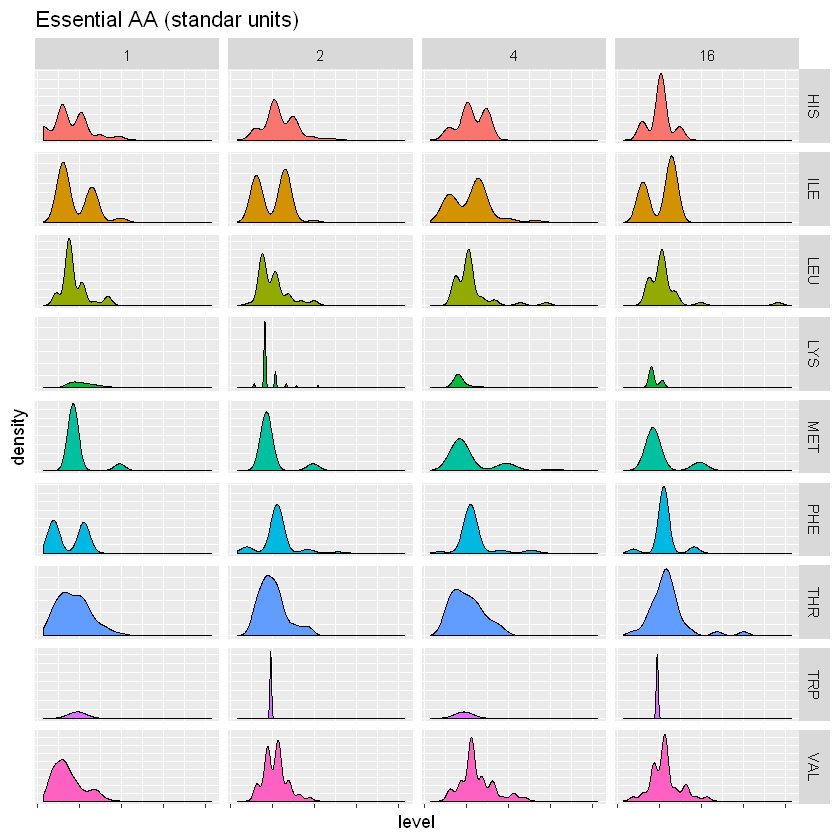

In [12]:
#png(filename="./plots/EAA_dist.png", units="cm", width=15, height=20, res = 300)

AA_E_Long_SU <- AA_E_Long %>% group_by(AA) %>% mutate(level = (level - mean(level, na.rm = TRUE))/sd(level, na.rm = TRUE))
 
ggplot(AA_E_Long_SU, aes(x = level, fill = AA)) + geom_density() + 
    guides(fill=FALSE) +
    facet_grid(AA ~ week, scales = "free_y") +
    theme( 
      #strip.background = element_blank(),
      axis.ticks.y = element_blank(),
      axis.text.y = element_blank(),
      axis.text.x = element_blank()
    ) + ggtitle('Essential AA (standar units)') 

#dev.off()


Warning message:
"Removed 781 rows containing non-finite values (stat_density)."

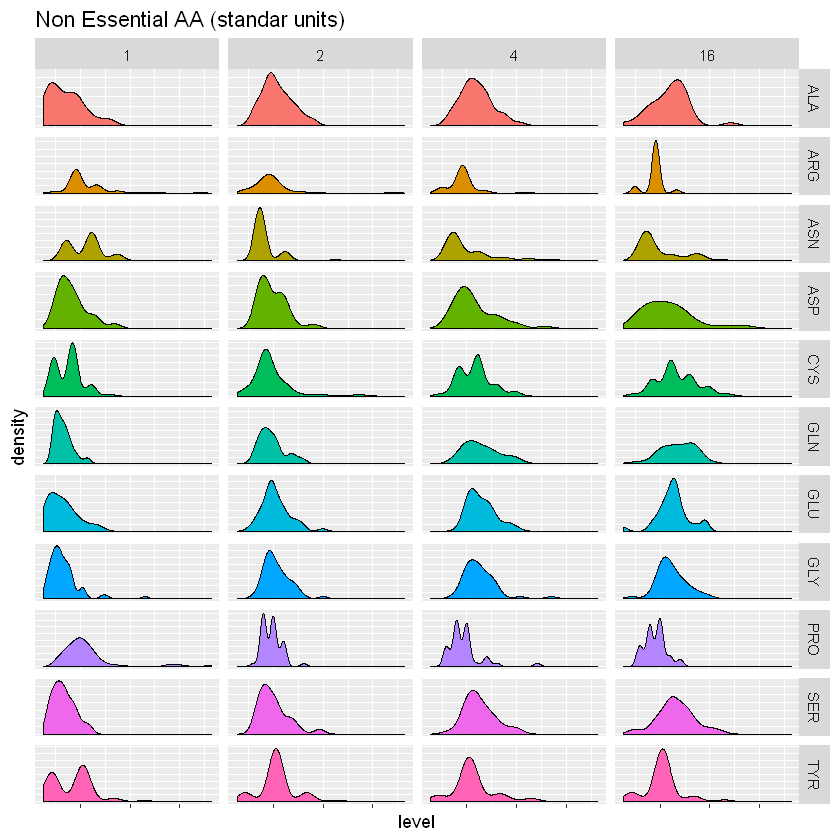

In [13]:
#png(filename="./plots/NEAA_dist.png", units="cm", width=15, height=20, res = 300)

AA_NE_Long_SU <- AA_NE_Long %>% group_by(AA) %>% mutate(level = (level - mean(level, na.rm = TRUE))/sd(level, na.rm = TRUE))

ggplot(AA_NE_Long_SU, aes(x = level, fill = AA)) + geom_density() + 
    guides(fill=FALSE) + 
    facet_grid(AA ~ week, scales = "free_y") +
    theme(
      #strip.background = element_blank(),
      axis.ticks.y = element_blank(),
      axis.text.y = element_blank(),
      axis.text.x = element_blank()
    ) + ggtitle('Non Essential AA (standar units)')

#dev.off()

In [14]:
AA_E_sum <- 
 AA_E_Long %>% group_by(week, AA) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) %>%
    mutate(mean = as.character(mean), sd = as.character(sd)) %>% 
    mutate(CI = paste(mean, '±', sd)) %>% 
    select(-mean, -sd) %>% 
    spread(week, CI)

AA_E_sum

AA,1,2,4,16
HIS,1.43 ± 0.98,2.29 ± 0.85,2.23 ± 0.71,1.95 ± 0.57
ILE,0.45 ± 0.59,0.56 ± 0.54,0.74 ± 0.68,0.62 ± 0.49
LEU,1.38 ± 1,1.79 ± 1.09,2.15 ± 1.39,2.19 ± 1.7
LYS,2.55 ± 2.21,1.38 ± 0.98,1.36 ± 0.99,1.27 ± 0.56
MET,0.09 ± 0.29,0.1 ± 0.31,0.23 ± 0.48,0.16 ± 0.37
PHE,0.48 ± 0.5,1 ± 0.51,1.13 ± 0.52,1.03 ± 0.37
THR,5.08 ± 3.05,6.15 ± 2.63,6.31 ± 2.9,7.68 ± 3.64
TRP,0.03 ± 0.17,0 ± 0,0.03 ± 0.16,0 ± 0
VAL,2.38 ± 1.34,3.73 ± 1.09,4.54 ± 1.6,4.05 ± 1.39


In [15]:
AA_NE_sum <- 
 AA_NE_Long %>% group_by(week, AA) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) %>%
    mutate(mean = as.character(mean), sd = as.character(sd)) %>% 
    mutate(CI = paste(mean, '±', sd)) %>% 
    select(-mean, -sd) %>% 
    spread(week, CI)

AA_NE_sum

AA,1,2,4,16
ALA,12.12 ± 9.02,20.98 ± 7.65,24 ± 8.15,24.11 ± 9.67
ARG,1.54 ± 1.15,1.12 ± 1.06,1 ± 0.69,0.95 ± 0.4
ASN,0.75 ± 0.66,0.21 ± 0.54,0.62 ± 1.02,0.54 ± 0.87
ASP,2.66 ± 2.15,3.69 ± 1.98,4.92 ± 3.06,5.03 ± 3.7
CYS,0.77 ± 0.7,1.27 ± 1.01,1.85 ± 0.87,2.3 ± 1.08
GLN,12.6 ± 10.68,31.42 ± 15.85,51.95 ± 21.76,56.05 ± 21.17
GLU,44.92 ± 33.93,89.46 ± 31.81,118.28 ± 31.19,114.84 ± 35.95
GLY,5.03 ± 4.07,10.12 ± 3.38,12.74 ± 4.46,12.24 ± 3.85
PRO,3.6 ± 2.82,2.81 ± 0.91,2.77 ± 1.68,2.54 ± 1.04
SER,4.57 ± 2.68,8.54 ± 3.62,11.62 ± 3.7,12.32 ± 4.44


## Sex and Free AA levels:

http://felixhaass.de/dataviz_ggplot2/session4.html


In [16]:
library(broom.mixed)


Attaching package: 'broom.mixed'

The following object is masked from 'package:broom':

    tidyMCMC



In [17]:
AA_E_Nested <- AA_E_Long %>% group_by(AA) %>% nest()
AA_NE_Nested <- AA_NE_Long %>% group_by(AA) %>% nest()

In [18]:
meSex <- function(df){
    
    me <- lmer(level ~ sex + week + (1 | id), data = df)
    
    return(me)
}

In [19]:
nAA_E <- length(AA_E_Nested$AA)
nAA_NE <- length(AA_NE_Nested$AA)

In [20]:
me_E <- list()
tidy_E <- list()

for(i in 1:nAA_E){
    
    me_E[[i]] <- meSex(AA_E_Nested$data[[i]])
    tidy_E[[i]] <- tidy(me_E[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
    
}

In [21]:
me_NE <- list()
tidy_NE <- list()

for(j in 1:nAA_NE) {
    me_NE[[j]] <- meSex(AA_NE_Nested$data[[j]])
    tidy_NE[[j]] <- tidy(me_NE[[j]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[j])
}

In [22]:
AA_E_Nested <- AA_E_Nested %>% mutate(model = me_E, tidy = tidy_E)
AA_NE_Nested <- AA_NE_Nested %>% mutate(model = me_NE, tidy = tidy_NE)

In [23]:
me_E[[1]]
AA_E_Nested$tidy[[1]]

Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + week + (1 | id)
   Data: df
REML criterion at convergence: 485.4003
Random effects:
 Groups   Name        Std.Dev.
 id       (Intercept) 0.2791  
 Residual             0.8480  
Number of obs: 183, groups:  id, 61
Fixed Effects:
(Intercept)       sexboy         week  
   1.776441     0.179637     0.009056  

effect,term,estimate,std.error,statistic,AA
fixed,(Intercept),1.776440529,0.12542575,14.1632844,HIS
fixed,sexboy,0.179637148,0.14826963,1.2115572,HIS
fixed,week,0.009055677,0.01114069,0.8128474,HIS


In [24]:
sexCoef_E <- bind_rows(tidy_E) %>% filter(grepl("sexboy", term))
sexCoef_NE <- bind_rows(tidy_NE) %>% filter(grepl("sexboy", term))

sexCoef_E
sexCoef_NE

effect,term,estimate,std.error,statistic,AA
fixed,sexboy,0.179637148,0.14826963,1.2115572,HIS
fixed,sexboy,0.088613218,0.10500084,0.8439287,ILE
fixed,sexboy,0.040495036,0.19819822,0.2043158,LEU
fixed,sexboy,0.174878897,0.21943104,0.7969652,LYS
fixed,sexboy,0.061657018,0.05528562,1.1152452,MET
fixed,sexboy,0.117331807,0.08059965,1.4557359,PHE
fixed,sexboy,-0.687749892,0.61301954,-1.1219053,THR
fixed,sexboy,-0.003569898,0.01565889,-0.2279790,TRP
fixed,sexboy,0.260670679,0.25206341,1.0341472,VAL


effect,term,estimate,std.error,statistic,AA
fixed,sexboy,0.14073970,0.1529303,0.9202867,ARG
fixed,sexboy,0.55352849,0.4824506,1.1473268,ASP
fixed,sexboy,1.64897865,1.6709972,0.9868231,ALA
fixed,sexboy,-0.08409476,0.1258007,-0.6684763,ASN
fixed,sexboy,0.36643929,0.1655625,2.2132985,CYS
fixed,sexboy,1.83468673,0.8053847,2.2780253,GLY
fixed,sexboy,14.45211622,6.6578580,2.1706856,GLU
fixed,sexboy,3.21092145,3.5211046,0.9119074,GLN
fixed,sexboy,0.38254081,0.3443933,1.1107673,PRO
fixed,sexboy,1.25092729,0.7143037,1.7512541,SER


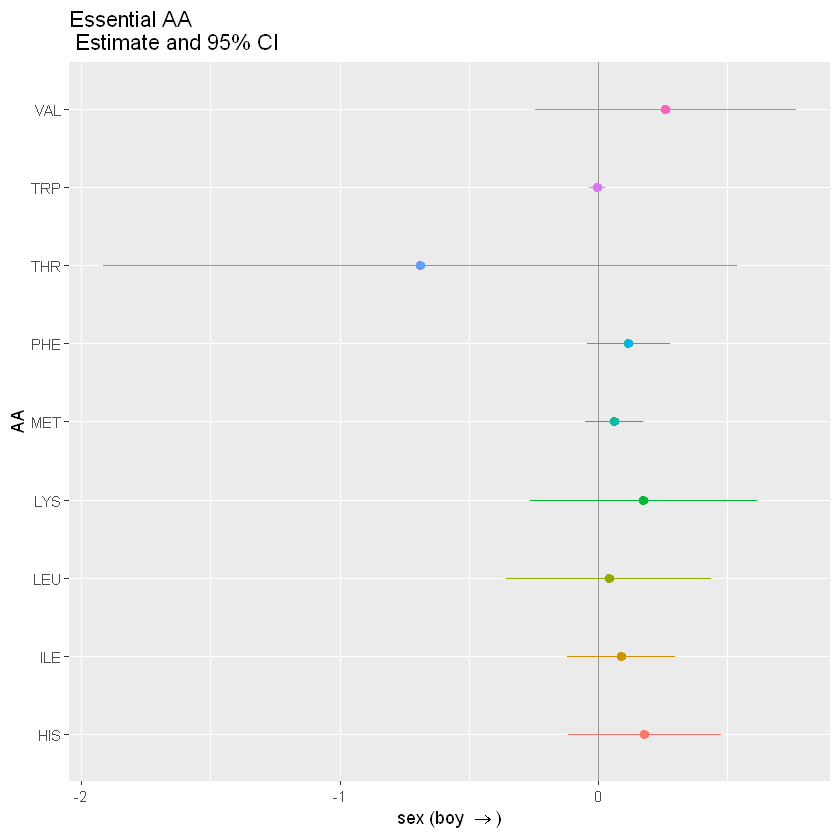

In [25]:
#png(filename="./plots/EAA_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_E, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ylab(TeX('sex (boy $\\rightarrow$)')) + ggtitle('Essential AA \n Estimate and 95% CI') 
#dev.off()

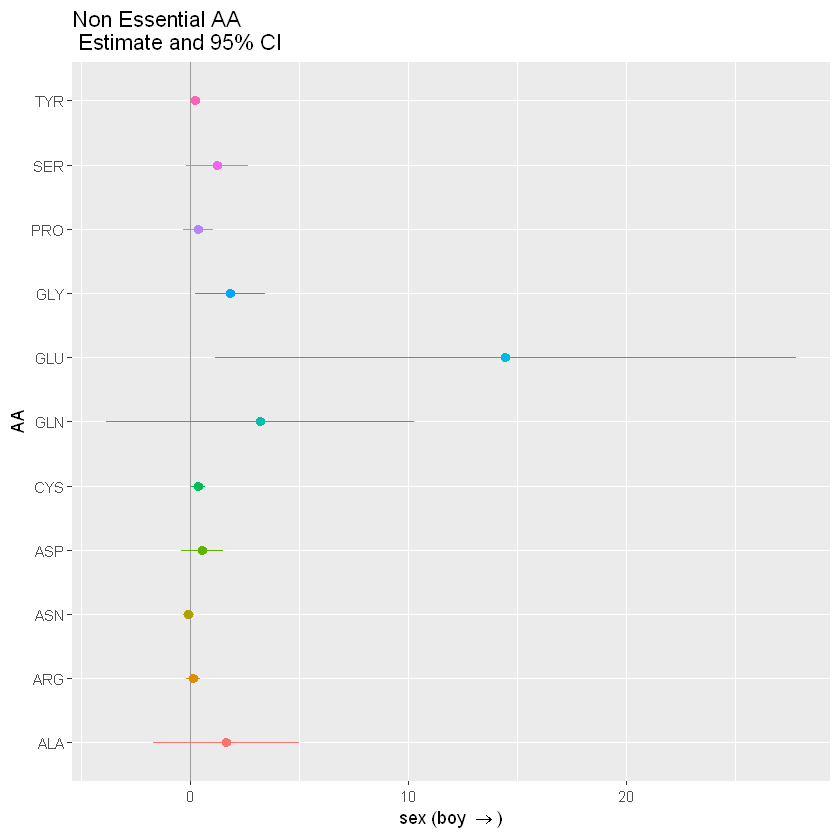

In [26]:
#png(filename="./plots/NEAA_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") +
    coord_flip() +
    ylab(TeX('sex (boy $\\rightarrow$)')) + ggtitle('Non Essential AA \n Estimate and 95% CI')
#dev.off()

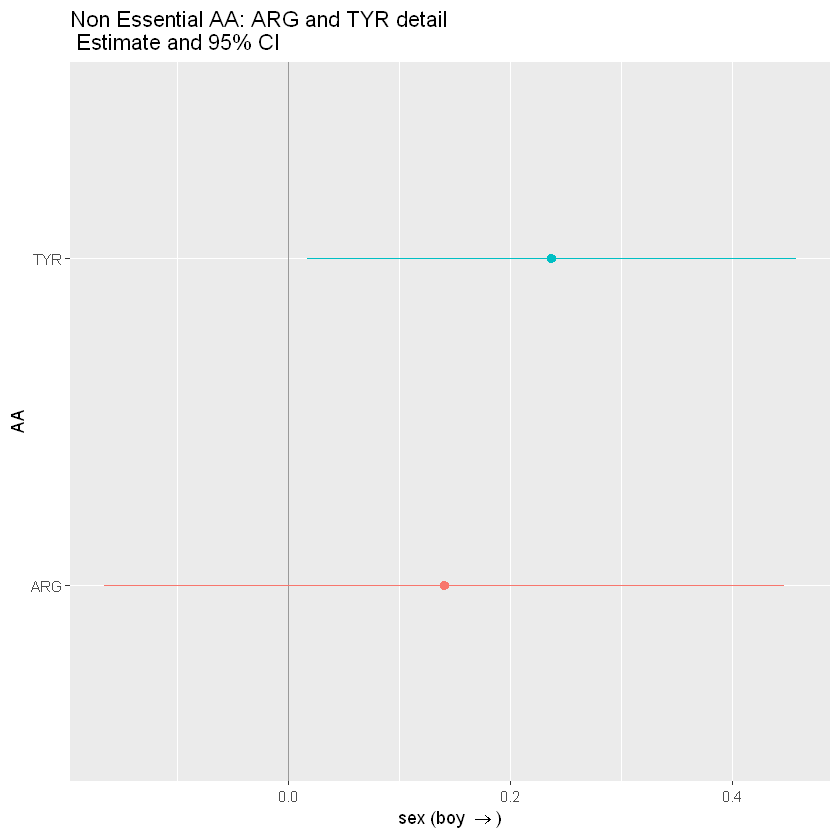

In [27]:
AATYR <- sexCoef_NE %>% filter(AA == 'ARG' | AA == 'TYR')

#png(filename="./plots/NEAA_ARGTYR_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(AATYR, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") +
    coord_flip() +
    ylab(TeX('sex (boy $\\rightarrow$)')) + ggtitle('Non Essential AA: ARG and TYR detail \n Estimate and 95% CI')
#dev.off()

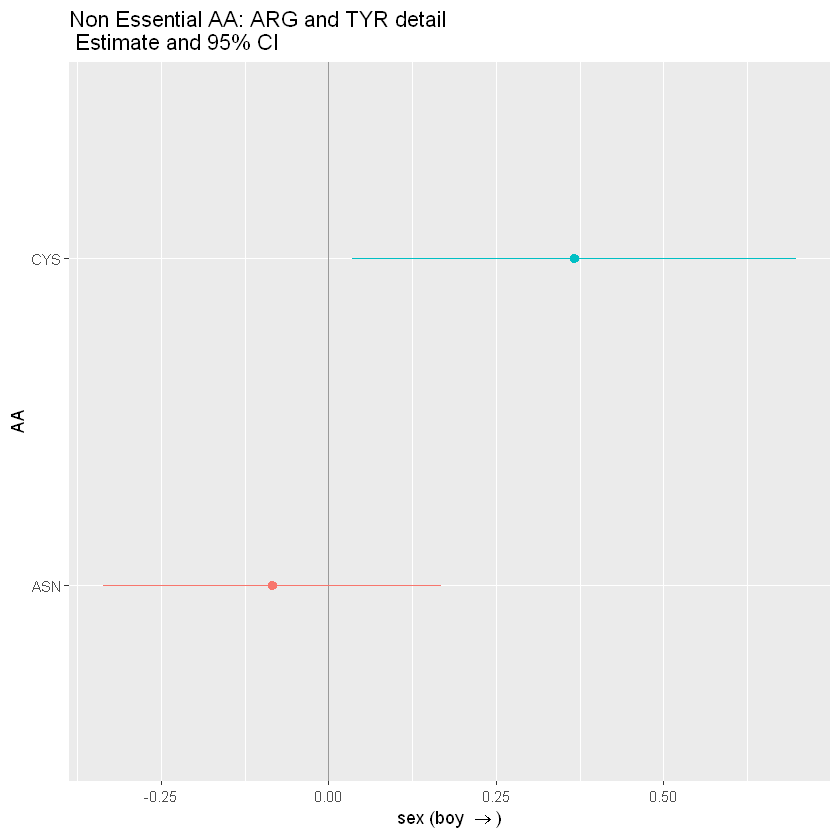

In [28]:
CYSASN <- sexCoef_NE %>% filter(AA == 'CYS' | AA == 'ASN')

#png(filename="./plots/NEAA_ARGTYR_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(CYSASN, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") +
    coord_flip() +
    ylab(TeX('sex (boy $\\rightarrow$)')) + ggtitle('Non Essential AA: ARG and TYR detail \n Estimate and 95% CI')
#dev.off()

In [29]:
AA_NE_Long %>% group_by(id) %>% summarise(TAA = mean(level, na.rm = T)) %>% head()

id,TAA
1,14.477273
2,17.409091
3,16.045455
4,5.818182
5,4.000000
6,13.909091


## Group and Free AA levels

$AA = \alpha_0 + \alpha_1 \ group + \alpha_2 \ sex + \alpha_3 \ week + \alpha_{id}$

In [30]:
meGroup <- function(df){
    
    me <- lmer(level ~ sex + group + week + (1 | id), data = df)
    
    return(me)
}

In [31]:
me_E_G <- list()
tidy_E_G <- list()

for(i in 1:nAA_E){
    
    me_E_G[[i]] <- meGroup(AA_E_Nested$data[[i]])
    tidy_E_G[[i]] <- tidy(me_E_G[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
    
}

In [32]:
me_NE_G <- list()
tidy_NE_G <- list()

for(i in 1:nAA_NE){
    
    me_NE_G[[i]] <- meGroup(AA_NE_Nested$data[[i]])
    tidy_NE_G[[i]] <- tidy(me_NE_G[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])

}

In [33]:
AA_E_Nested <- AA_E_Nested %>% mutate(model_G = me_E_G, tidy_G = tidy_E_G)
AA_NE_Nested <- AA_NE_Nested %>% mutate(model_G = me_NE_G, tidy_G = tidy_NE_G)

In [34]:
me_E_G[1]
AA_E_Nested$tidy_G[[1]]
AA_E_Nested$tidy[[1]]

[[1]]
Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + group + week + (1 | id)
   Data: df
REML criterion at convergence: 487.0376
Random effects:
 Groups   Name        Std.Dev.
 id       (Intercept) 0.2843  
 Residual             0.8486  
Number of obs: 183, groups:  id, 61
Fixed Effects:
(Intercept)       sexboy   groupadult         week  
   1.735365     0.198264     0.078707     0.008659  


effect,term,estimate,std.error,statistic,AA
fixed,(Intercept),1.735364729,0.14946469,11.6105334,HIS
fixed,sexboy,0.198264129,0.15352949,1.2913749,HIS
fixed,groupadult,0.078707251,0.15488689,0.5081595,HIS
fixed,week,0.008659321,0.01117558,0.7748430,HIS


effect,term,estimate,std.error,statistic,AA
fixed,(Intercept),1.776440529,0.12542575,14.1632844,HIS
fixed,sexboy,0.179637148,0.14826963,1.2115572,HIS
fixed,week,0.009055677,0.01114069,0.8128474,HIS


In [35]:
sexCoef_E_G <- bind_rows(tidy_E_G) %>% filter(grepl("sexboy", term))
sexCoef_NE_G <- bind_rows(tidy_NE_G) %>% filter(grepl("sexboy", term))

groupCoef_E_G <- bind_rows(tidy_E_G) %>% filter(grepl("groupadult", term))
groupCoef_NE_G <- bind_rows(tidy_NE_G) %>% filter(grepl("groupadult", term))

sexCoef_NE_G
groupCoef_E_G
groupCoef_NE_G

effect,term,estimate,std.error,statistic,AA
fixed,sexboy,0.12875803,0.1587173,0.8112415,ARG
fixed,sexboy,0.48898235,0.4998729,0.9782133,ASP
fixed,sexboy,1.88231168,1.7243405,1.0916125,ALA
fixed,sexboy,-0.04513407,0.1290757,-0.3496712,ASN
fixed,sexboy,0.33374428,0.1711375,1.9501525,CYS
fixed,sexboy,1.83744597,0.8368059,2.1957851,GLY
fixed,sexboy,13.42882741,6.9197059,1.9406645,GLU
fixed,sexboy,5.14216990,3.4559402,1.4879221,GLN
fixed,sexboy,0.34213434,0.3558679,0.9614083,PRO
fixed,sexboy,1.53337035,0.7180422,2.1354877,SER


effect,term,estimate,std.error,statistic,AA
fixed,groupadult,0.078707251,0.15488689,0.5081595,HIS
fixed,groupadult,-0.079596925,0.10924127,-0.7286342,ILE
fixed,groupadult,0.080070978,0.20778112,0.3853621,LEU
fixed,groupadult,0.078731029,0.23015010,0.3420856,LYS
fixed,groupadult,0.031222250,0.05794368,0.5388379,MET
fixed,groupadult,0.034067776,0.08401854,0.4054792,PHE
fixed,groupadult,0.918000361,0.62783098,1.4621776,THR
fixed,groupadult,0.004198853,0.01633558,0.2570373,TRP
fixed,groupadult,0.076820636,0.26418239,0.2907864,VAL


effect,term,estimate,std.error,statistic,AA
fixed,groupadult,-0.05705268,0.1601939,-0.356147698,ARG
fixed,groupadult,-0.28399312,0.5045151,-0.562903080,ASP
fixed,groupadult,1.00021504,1.7402092,0.574767135,ALA
fixed,groupadult,0.16273681,0.1301663,1.250222557,ASN
fixed,groupadult,-0.14044279,0.1727313,-0.813070974,CYS
fixed,groupadult,0.00459890,0.8444166,0.005446246,GLY
fixed,groupadult,-4.45167262,6.9810926,-0.637675625,GLU
fixed,groupadult,8.20050162,3.4861317,2.352321266,GLN
fixed,groupadult,-0.17499676,0.3591263,-0.487284722,PRO
fixed,groupadult,1.21021751,0.7244904,1.670439585,SER


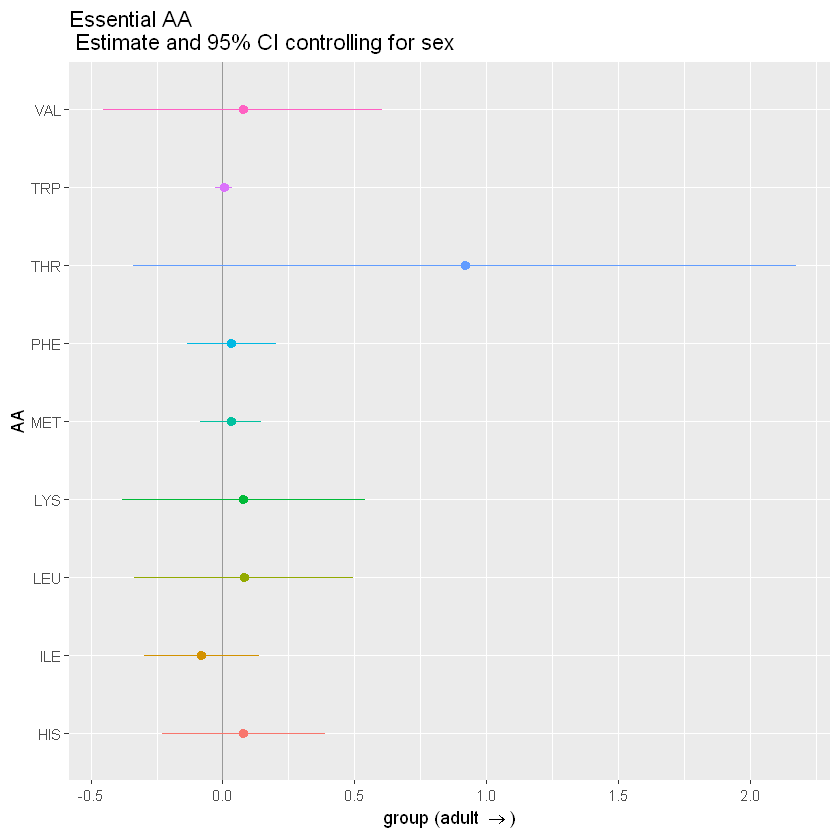

In [36]:
#png(filename="./plots/EAA_G_given_S_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(groupCoef_E_G, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab(TeX('group (adult $\\rightarrow$)')) + 
    ggtitle('Essential AA \n Estimate and 95% CI controlling for sex') 
#dev.off()

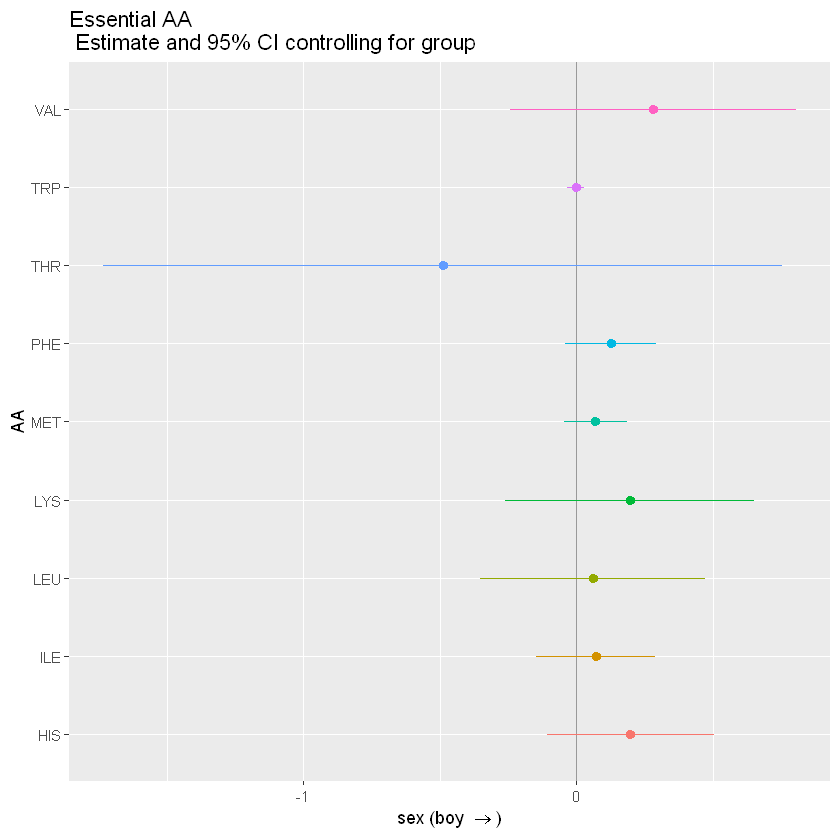

In [37]:
#png(filename="./plots/EAA_S_given_G_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_E_G, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab(TeX('sex (boy $\\rightarrow$)')) + 
    ggtitle('Essential AA \n Estimate and 95% CI controlling for group') 
#dev.off()

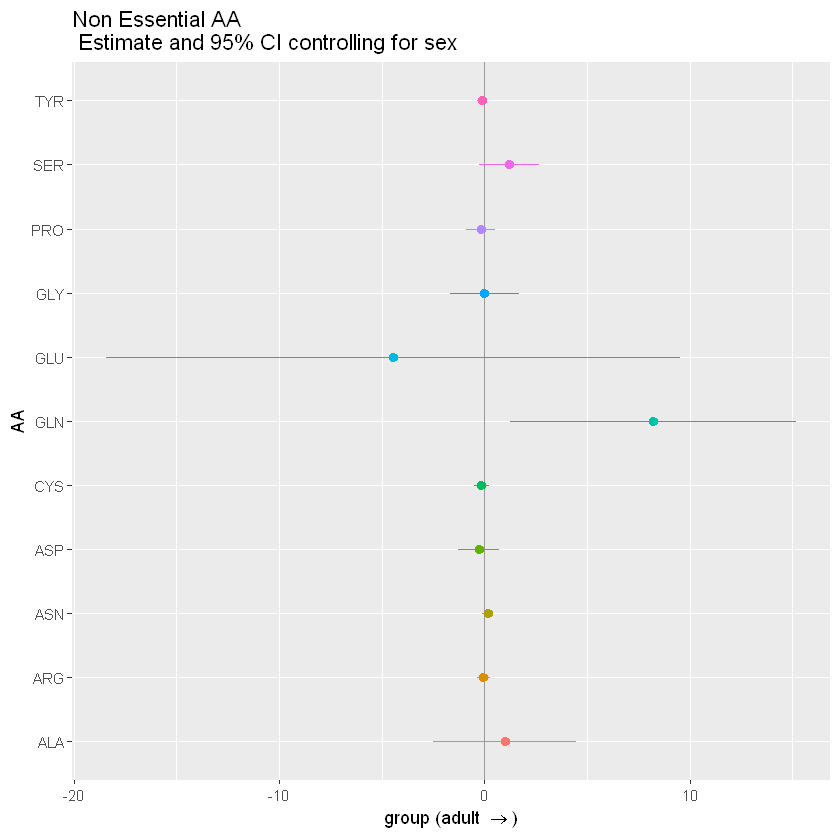

In [38]:
#png(filename="./plots/NEAA_G_given_S_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(groupCoef_NE_G, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") +
    coord_flip() + ylab(TeX('group (adult $\\rightarrow$)')) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI controlling for sex')
#dev.off()

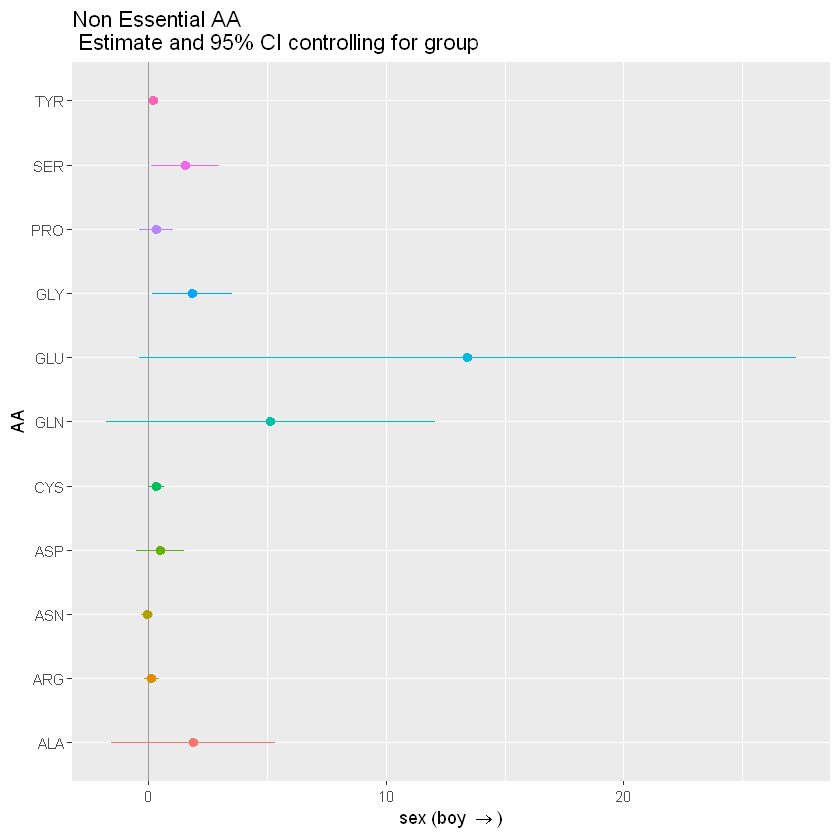

In [39]:
#png(filename="./plots/NEAA_S_given_G_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE_G, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") +
    coord_flip() + ylab(TeX('sex (boy $\\rightarrow$)')) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI controlling for group')
#dev.off()

In [40]:
AA_E %>% group_by(sex, group) %>% summarise(n())

sex,group,n()
girl,teen,13
girl,adult,13
boy,teen,24
boy,adult,11
NA,teen,2
NA,adult,2


## Sex-Week interaction and Free AA

$$
\begin{align*}
AA &= \alpha_0 + \alpha_1 \ sex + \alpha_2 \ week + \alpha_3 \ sex \times week + \alpha_{id} \\
   &= \alpha_0 + \alpha_1 \ sex + \left( \alpha_2 + \alpha_3 \ sex \right) \times week + \alpha_{id}
\end{align*}
$$

In [41]:
meSexWeek <- function(df){
    
    me <- lmer(level ~ sex + week + sex:week + (1 | id), data = df)
    
    return(me)
}

In [42]:
me_E_SW <- list()
tidy_E_SW <- list()

for(i in 1:nAA_E){
    
    me_E_SW[[i]] <- meSexWeek(AA_E_Nested$data[[i]])
    covMat_E <- vcov(me_E_SW[[i]])
    tidy_E_SW[[i]] <- tidy(me_E_SW[[i]], effects = 'fixed') %>% 
        mutate(AA = AA_E_Nested$AA[i], var_W = covMat_E[3, 3], var_SW = covMat_E[4, 4], cov_SW = covMat_E[3, 4])
   
}

In [43]:
me_NE_SW <- list()
tidy_NE_SW <- list()

for(i in 1:nAA_NE){
    
    me_NE_SW[[i]] <- meSexWeek(AA_NE_Nested$data[[i]])
    covMat_NE <- vcov(me_NE_SW[[i]])
    tidy_NE_SW[[i]] <- tidy(me_NE_SW[[i]], effects = 'fixed') %>% 
        mutate(AA = AA_NE_Nested$AA[i], var_W = covMat_NE[3, 3], var_SW = covMat_NE[4, 4], cov_SW = covMat_NE[3, 4])

}

In [44]:
vcov(me_E_SW[[1]])

4 x 4 Matrix of class "dpoMatrix"
             (Intercept)       sexboy          week   sexboy:week
(Intercept)  0.019520193 -0.019520193 -0.0013732530  0.0013732530
sexboy      -0.019520193  0.033833078  0.0013732530 -0.0024371933
week        -0.001373253  0.001373253  0.0002747843 -0.0002747843
sexboy:week  0.001373253 -0.002437193 -0.0002747843  0.0005031010

In [45]:
AA_E_Nested <- AA_E_Nested %>% mutate(model_SW = me_E_SW, tidy_SW = tidy_E_SW)
AA_NE_Nested <- AA_NE_Nested %>% mutate(model_SW = me_NE_SW, tidy_SW = tidy_NE_SW)

In [46]:
AA_E_Nested$model_SW[1]
AA_E_Nested$tidy_SW[1]

[[1]]
Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + week + sex:week + (1 | id)
   Data: df
REML criterion at convergence: 490.8816
Random effects:
 Groups   Name        Std.Dev.
 id       (Intercept) 0.2782  
 Residual             0.8501  
Number of obs: 183, groups:  id, 61
Fixed Effects:
(Intercept)       sexboy         week  sexboy:week  
   1.808736     0.122440     0.002613     0.011808  


effect,term,estimate,std.error,statistic,AA,var_W,var_SW,cov_SW
fixed,(Intercept),1.808736489,0.13971468,12.9459298,HIS,0.0002747843,0.000503101,-0.0002747843
fixed,sexboy,0.122440475,0.18393770,0.6656627,HIS,0.0002747843,0.000503101,-0.0002747843
fixed,week,0.002612866,0.01657662,0.1576236,HIS,0.0002747843,0.000503101,-0.0002747843
fixed,sexboy:week,0.011807988,0.02242991,0.5264393,HIS,0.0002747843,0.000503101,-0.0002747843


In [47]:
df1_E <- bind_rows(tidy_E_SW) %>% filter(grepl("^week$", term))
df2_E <- bind_rows(tidy_E_SW) %>% filter(grepl("^sexboy:week$", term))

left_join(df1_E, df2_E, by = c('AA', 'effect'))

effect,term.x,estimate.x,std.error.x,statistic.x,AA,var_W.x,var_SW.x,cov_SW.x,term.y,estimate.y,std.error.y,statistic.y,var_W.y,var_SW.y,cov_SW.y
fixed,week,0.002612866,0.016576619,0.1576236,HIS,2.747843e-04,5.031010e-04,-2.747843e-04,sexboy:week,0.0118079876,0.022429913,0.526439294,2.747843e-04,5.031010e-04,-2.747843e-04
fixed,week,0.015668427,0.010139631,1.5452660,ILE,1.028121e-04,1.888612e-04,-1.028121e-04,sexboy:week,-0.0120909974,0.013742676,-0.879813876,1.028121e-04,1.888612e-04,-1.028121e-04
fixed,week,0.032661412,0.024641902,1.3254420,LEU,6.072233e-04,1.108458e-03,-6.072233e-04,sexboy:week,0.0171436327,0.033293508,0.514924197,6.072233e-04,1.108458e-03,-6.072233e-04
fixed,week,-0.031840262,0.025117007,-1.2676774,LYS,6.308640e-04,1.154138e-03,-6.308640e-04,sexboy:week,-0.0277547062,0.033972612,-0.816972989,6.308640e-04,1.154138e-03,-6.308640e-04
fixed,week,0.003823882,0.006928368,0.5519167,MET,4.800229e-05,8.760360e-05,-4.800229e-05,sexboy:week,0.0008289634,0.009359680,0.088567499,4.800229e-05,8.760360e-05,-4.800229e-05
fixed,week,0.021258453,0.010458705,2.0326085,PHE,1.093845e-04,1.988404e-04,-1.093845e-04,sexboy:week,0.0003254222,0.014101079,0.023077821,1.093845e-04,1.988404e-04,-1.093845e-04
fixed,week,0.153076793,0.047632842,3.2136817,THR,2.268888e-03,4.182830e-03,-2.268888e-03,sexboy:week,-0.0446219403,0.064674800,-0.689943232,2.268888e-03,4.182830e-03,-2.268888e-03
fixed,week,-0.000413382,0.002032778,-0.2033581,TRP,4.132188e-06,7.533281e-06,-4.132188e-06,sexboy:week,-0.0007504544,0.002744682,-0.273421226,4.132188e-06,7.533281e-06,-4.132188e-06
fixed,week,0.072450086,0.028218034,2.5675101,VAL,7.962574e-04,1.457804e-03,-7.962574e-04,sexboy:week,-0.0001173385,0.038181199,-0.003073201,7.962574e-04,1.457804e-03,-7.962574e-04


In [48]:
df1_E <- bind_rows(tidy_E_SW) %>% filter(grepl("^week$", term))
df2_E <- bind_rows(tidy_E_SW) %>% filter(grepl("^sexboy:week$", term))

sexCoef_E_SW <- left_join(df1_E, df2_E, by = c('AA', 'effect')) %>% 
            mutate(estimate_girl = estimate.x,
                   estimate_boy = estimate.x + estimate.y, 
                   std.error_boy = sqrt(var_W.x + var_SW.x + 2*cov_SW.x)) %>% 
            select(effect, AA, estimate_boy, std.error_boy, estimate_girl)

sexCoef_E_SW

effect,AA,estimate_boy,std.error_boy,estimate_girl
fixed,HIS,0.014420854,0.015110153,0.002612866
fixed,ILE,0.003577430,0.009276262,0.015668427
fixed,LEU,0.049805045,0.022388263,0.032661412
fixed,LYS,-0.059594968,0.022875190,-0.031840262
fixed,MET,0.004652845,0.006292958,0.003823882
fixed,PHE,0.021583876,0.009458114,0.021258453
fixed,THR,0.108454852,0.043748624,0.153076793
fixed,TRP,-0.001163836,0.001844205,-0.000413382
fixed,VAL,0.072332748,0.025720547,0.072450086


In [49]:
df1_NE <- bind_rows(tidy_NE_SW) %>% filter(grepl("^week$", term))
df2_NE <- bind_rows(tidy_NE_SW) %>% filter(grepl("^sexboy:week$", term))

sexCoef_NE_SW <- left_join(df1_NE, df2_NE, by = c('AA', 'effect')) %>% 
            mutate(estimate_girl = estimate.x,
                   estimate_boy = estimate.x + estimate.y, 
                   std.error_boy = sqrt(var_W.x + var_SW.x + 2*cov_SW.x)) %>% 
            select(effect, AA, estimate_boy, std.error_boy, estimate_girl)

sexCoef_NE_SW

effect,AA,estimate_boy,std.error_boy,estimate_girl
fixed,ARG,-0.032405848,0.014090296,-0.010846008
fixed,ASP,0.159940361,0.044341017,0.088414553
fixed,ALA,0.669325536,0.155548577,0.403477923
fixed,ASN,0.002062971,0.013834372,-0.008616085
fixed,CYS,0.098553935,0.015107895,0.074835846
fixed,GLY,0.353514499,0.077920652,0.327704341
fixed,GLU,3.695463574,0.677260671,3.056393934
fixed,GLN,2.429967802,0.348495574,2.187116258
fixed,PRO,-0.051868937,0.032674936,-0.044056790
fixed,SER,0.422110920,0.068513836,0.369754547


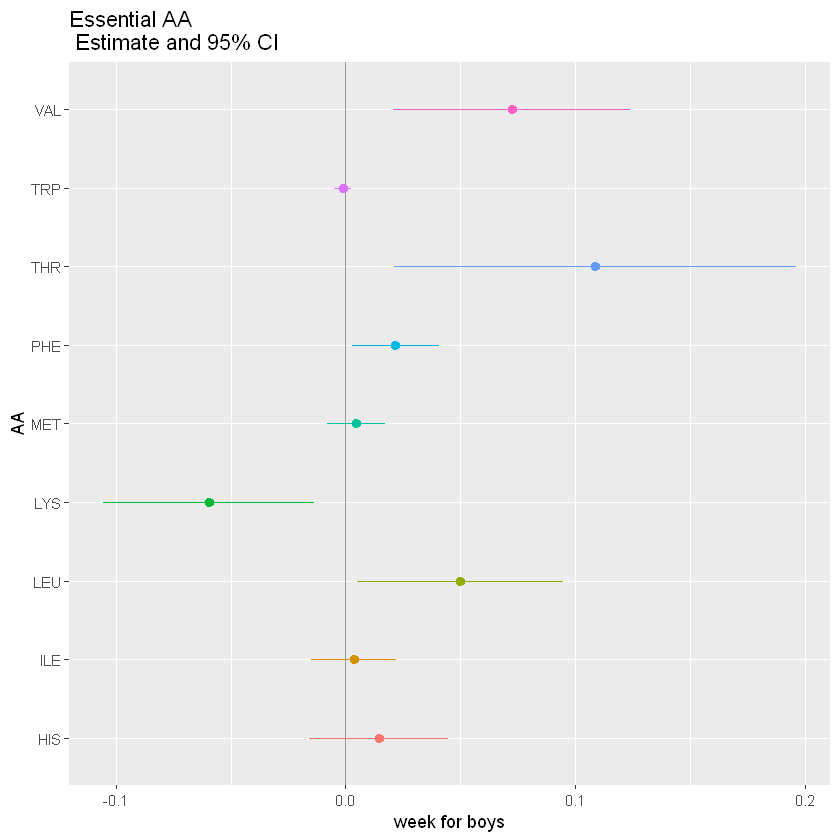

In [50]:
#png(filename="./plots/EAA_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_E_SW, aes(x = AA, y = estimate_boy, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate_boy - 2*std.error_boy, ymax = estimate_boy + 2*std.error_boy)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab('week for boys') + 
    ggtitle('Essential AA \n Estimate and 95% CI') 
#dev.off()

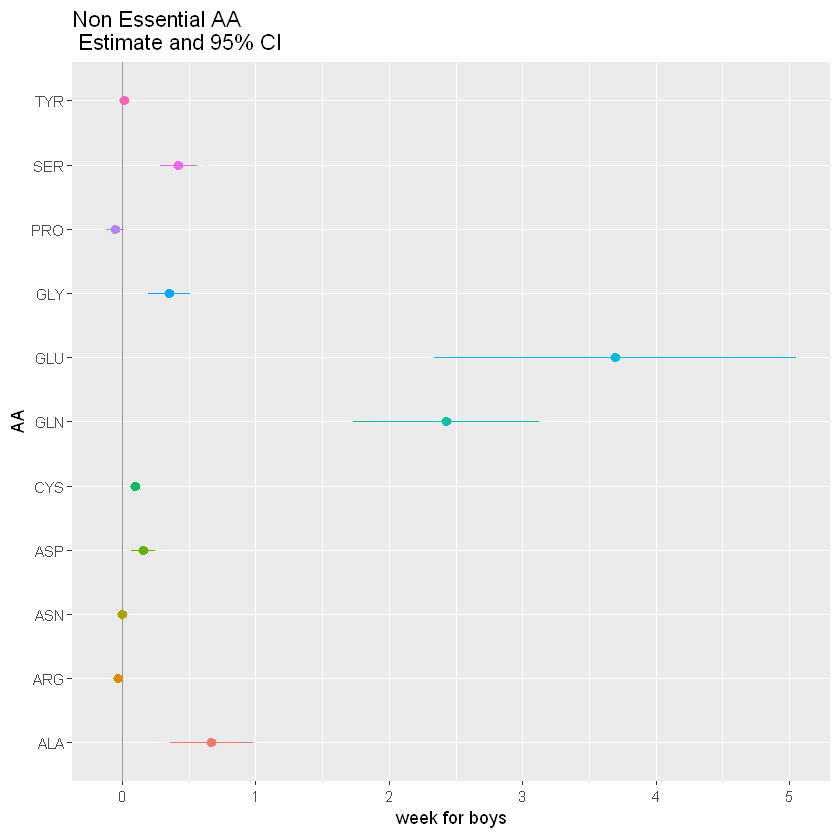

In [51]:
#png(filename="./plots/NEAA_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE_SW, aes(x = AA, y = estimate_boy, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate_boy - 2*std.error_boy, ymax = estimate_boy + 2*std.error_boy)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab(TeX('week for boys')) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI') 
#dev.off()

In [52]:
a_0_E <- bind_rows(tidy_E_SW) %>% filter(grepl("(Intercept)", term)) %>% 
                select(AA, estimate.a_0 = estimate, std.error.a_0 = std.error)
a_0_NE <- bind_rows(tidy_NE_SW) %>% filter(grepl("(Intercept)", term)) %>% 
                select(AA, estimate.a_0 = estimate, std.error.a_0 = std.error)

a_0_E 
a_0_NE 

AA,estimate.a_0,std.error.a_0
HIS,1.80873649,0.13971468
ILE,0.44104761,0.09369154
LEU,1.63667005,0.19551658
LYS,1.76403506,0.20801540
MET,0.08233561,0.05472538
PHE,0.69558953,0.08168510
THR,5.75930577,0.51689861
TRP,0.01492982,0.01577609
VAL,2.98515007,0.23760977


AA,estimate.a_0,std.error.a_0
ARG,1.1683106,0.13782134
ASP,3.1176259,0.43805579
ALA,16.3290953,1.52629570
ASN,0.6397583,0.12254220
CYS,0.8555460,0.14980618
GLY,6.6789461,0.74393501
GLU,62.0894968,6.27197008
GLN,21.6839891,3.27898888
PRO,3.0518183,0.31543060
SER,6.0760260,0.65726590


In [53]:
ablines_E_SW <- left_join(sexCoef_E_SW, a_0_E, by = 'AA') %>% select(AA, estimate_boy, estimate_girl, estimate.a_0)
ablines_NE_SW <- left_join(sexCoef_NE_SW, a_0_NE, by = 'AA') %>% select(AA, estimate_boy, estimate_girl, estimate.a_0)

ablines_E_SW <- ablines_E_SW %>% gather(sex, estimate, 2:3)
ablines_NE_SW <- ablines_NE_SW %>% gather(sex, estimate, 2:3)

ablines_E_SW
ablines_NE_SW

AA,estimate.a_0,sex,estimate
HIS,1.80873649,estimate_boy,0.014420854
ILE,0.44104761,estimate_boy,0.003577430
LEU,1.63667005,estimate_boy,0.049805045
LYS,1.76403506,estimate_boy,-0.059594968
MET,0.08233561,estimate_boy,0.004652845
PHE,0.69558953,estimate_boy,0.021583876
THR,5.75930577,estimate_boy,0.108454852
TRP,0.01492982,estimate_boy,-0.001163836
VAL,2.98515007,estimate_boy,0.072332748
HIS,1.80873649,estimate_girl,0.002612866


AA,estimate.a_0,sex,estimate
ARG,1.1683106,estimate_boy,-0.032405848
ASP,3.1176259,estimate_boy,0.159940361
ALA,16.3290953,estimate_boy,0.669325536
ASN,0.6397583,estimate_boy,0.002062971
CYS,0.8555460,estimate_boy,0.098553935
GLY,6.6789461,estimate_boy,0.353514499
GLU,62.0894968,estimate_boy,3.695463574
GLN,21.6839891,estimate_boy,2.429967802
PRO,3.0518183,estimate_boy,-0.051868937
SER,6.0760260,estimate_boy,0.422110920


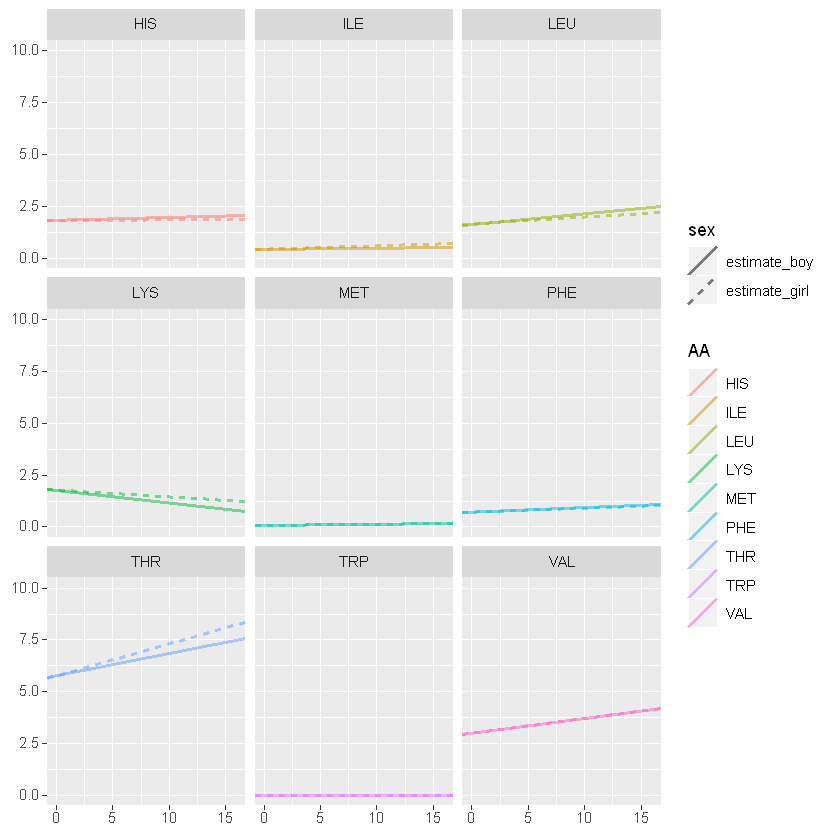

In [54]:
#png(filename="./plots/E_SW_trends.png", units="cm", width=20, height=20, res = 300)
ggplot() + 
    scale_x_continuous(limits=c(0, 16)) +
    scale_y_continuous(limits=c(0, 10)) + 
    geom_abline(data=ablines_E_SW, size = 1.1, alpha = 0.5,
                aes(slope = estimate, intercept = estimate.a_0, color = AA, linetype=sex)) + 
    facet_wrap(~AA)

#dev.off()

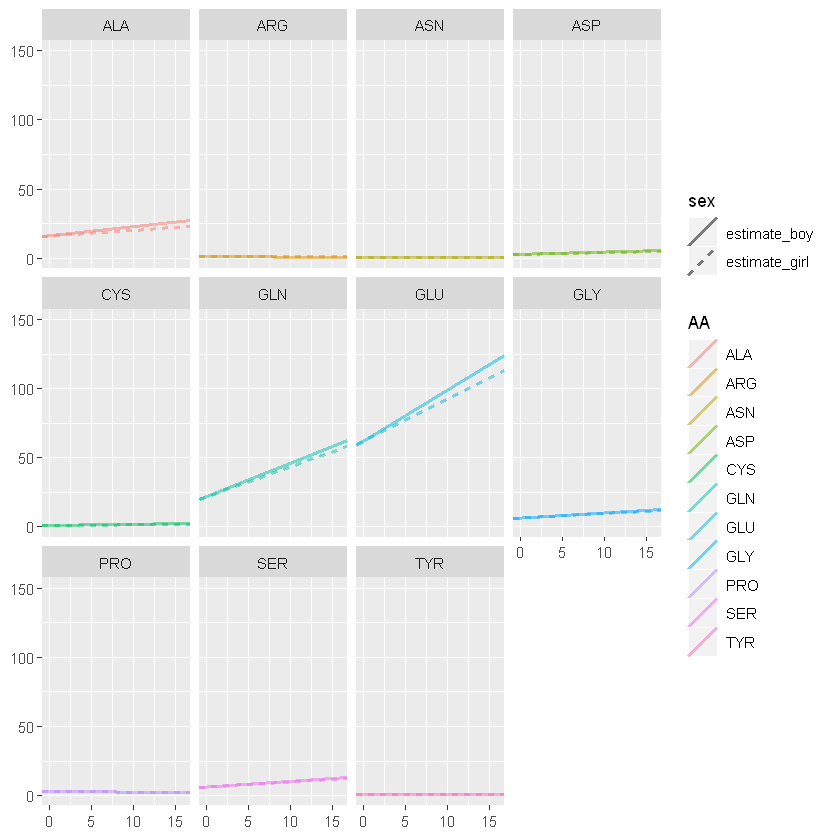

In [55]:
#png(filename="./plots/NE_SW_trends.png", units="cm", width=20, height=20, res = 300)
ggplot() + 
    scale_x_continuous(limits=c(0, 16)) +
    scale_y_continuous(limits=c(0, 150)) + 
    geom_abline(data=ablines_NE_SW, size = 1.1, alpha = 0.5,
                aes(slope = estimate, intercept = estimate.a_0, color = AA, linetype=sex)) + 
    facet_wrap(~AA)

#dev.off()

In [56]:
sexCoef_E_SW <- bind_rows(tidy_E_SW) %>% filter(grepl("^sexboy$", term)) %>% select(1:6)
sexCoef_NE_SW <- bind_rows(tidy_NE_SW) %>% filter(grepl("^sexboy$", term)) %>% select(1:6)

sexCoef_E_SW
sexCoef_NE_SW

effect,term,estimate,std.error,statistic,AA
fixed,sexboy,0.1224404751,0.18393770,0.665662740,HIS
fixed,sexboy,0.1456437249,0.12336780,1.180565121,ILE
fixed,sexboy,-0.0440058796,0.25738046,-0.170975995,LEU
fixed,sexboy,0.3084915430,0.27384991,1.126498620,LYS
fixed,sexboy,0.0575107102,0.07204078,0.798307764,MET
fixed,sexboy,0.1157102612,0.10709738,1.080421051,PHE
fixed,sexboy,-0.4833866429,0.68087874,-0.709945272,THR
fixed,sexboy,0.0001471507,0.02076730,0.007085695,TRP
fixed,sexboy,0.2608674979,0.31281845,0.833926192,VAL


effect,term,estimate,std.error,statistic,AA
fixed,sexboy,0.2421029,0.1814636,1.3341684,ARG
fixed,sexboy,0.2135958,0.5767811,0.3703239,ASP
fixed,sexboy,0.3833635,2.0096219,0.1907640,ALA
fixed,sexboy,-0.1365131,0.1613192,-0.8462300,ASN
fixed,sexboy,0.2533538,0.1972489,1.2844371,CYS
fixed,sexboy,1.7104382,0.9794628,1.7463024,GLY
fixed,sexboy,11.3579209,8.2572190,1.3755141,GLU
fixed,sexboy,2.0389724,4.3169949,0.4723129,GLN
fixed,sexboy,0.4194294,0.4153037,1.0099344,PRO
fixed,sexboy,0.9994842,0.8653622,1.1549895,SER


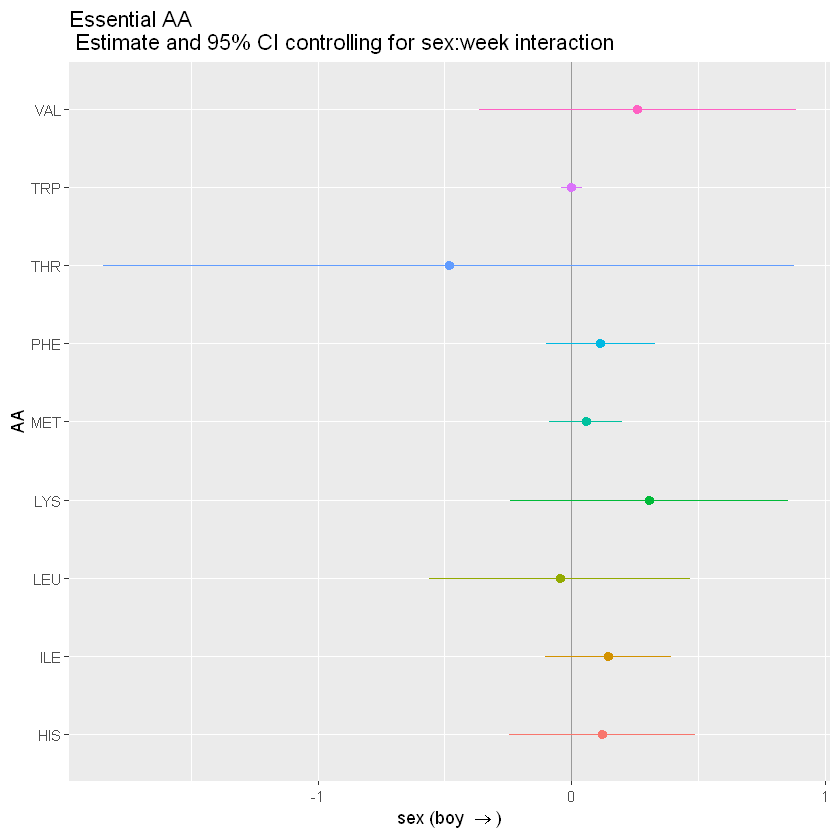

In [57]:
#png(filename="./plots/EAA_S_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_E_SW, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab(TeX('sex (boy $\\rightarrow$)')) + 
    ggtitle('Essential AA \n Estimate and 95% CI controlling for sex:week interaction') 
#dev.off()

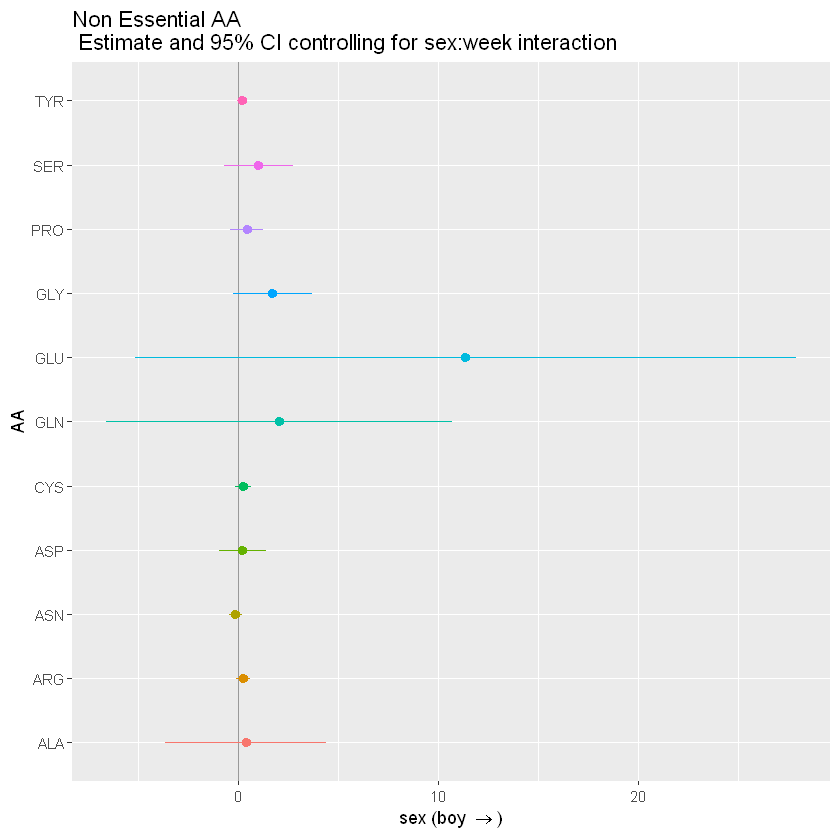

In [58]:
#png(filename="./plots/NEAA_S_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE_SW, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab(TeX('sex (boy $\\rightarrow$)')) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI controlling for sex:week interaction') 
#dev.off()

In [59]:
swCoef_E_SW <- bind_rows(tidy_E_SW) %>% filter(grepl("^sexboy:week$", term)) %>% select(1:6)
swCoef_NE_SW <- bind_rows(tidy_NE_SW) %>% filter(grepl("^sexboy:week$", term)) %>% select(1:6)

swCoef_E_SW
swCoef_NE_SW

effect,term,estimate,std.error,statistic,AA
fixed,sexboy:week,0.0118079876,0.022429913,0.526439294,HIS
fixed,sexboy:week,-0.0120909974,0.013742676,-0.879813876,ILE
fixed,sexboy:week,0.0171436327,0.033293508,0.514924197,LEU
fixed,sexboy:week,-0.0277547062,0.033972612,-0.816972989,LYS
fixed,sexboy:week,0.0008289634,0.009359680,0.088567499,MET
fixed,sexboy:week,0.0003254222,0.014101079,0.023077821,PHE
fixed,sexboy:week,-0.0446219403,0.064674800,-0.689943232,THR
fixed,sexboy:week,-0.0007504544,0.002744682,-0.273421226,TRP
fixed,sexboy:week,-0.0001173385,0.038181199,-0.003073201,VAL


effect,term,estimate,std.error,statistic,AA
fixed,sexboy:week,-0.021559840,0.02088780,-1.0321738,ARG
fixed,sexboy:week,0.071525807,0.06571870,1.0883632,ASP
fixed,sexboy:week,0.265847614,0.23057372,1.1529831,ALA
fixed,sexboy:week,0.010679056,0.02056285,0.5193373,ASN
fixed,sexboy:week,0.023718088,0.02239005,1.0593136,CYS
fixed,sexboy:week,0.025810158,0.11557376,0.2233220,GLY
fixed,sexboy:week,0.639069640,1.00530136,0.6356996,GLU
fixed,sexboy:week,0.242851544,0.51708024,0.4696593,GLN
fixed,sexboy:week,-0.007812146,0.04845195,-0.1612349,PRO
fixed,sexboy:week,0.052356373,0.10161003,0.5152677,SER


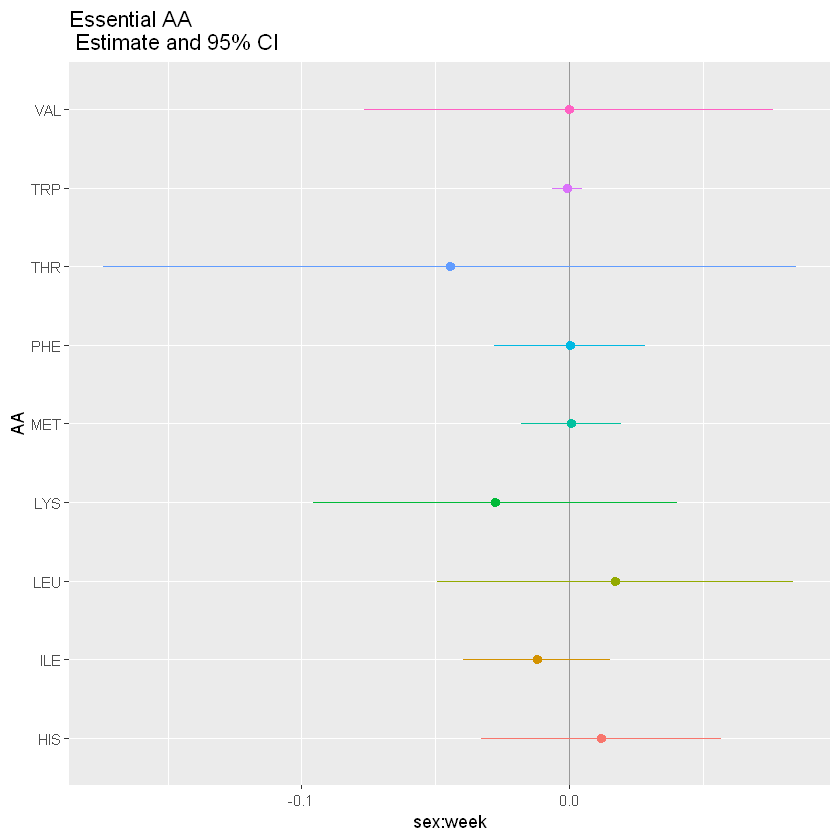

In [60]:
#png(filename="./plots/EAA_SW_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(swCoef_E_SW, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab(TeX('sex:week')) + 
    ggtitle('Essential AA \n Estimate and 95% CI') 
#dev.off()

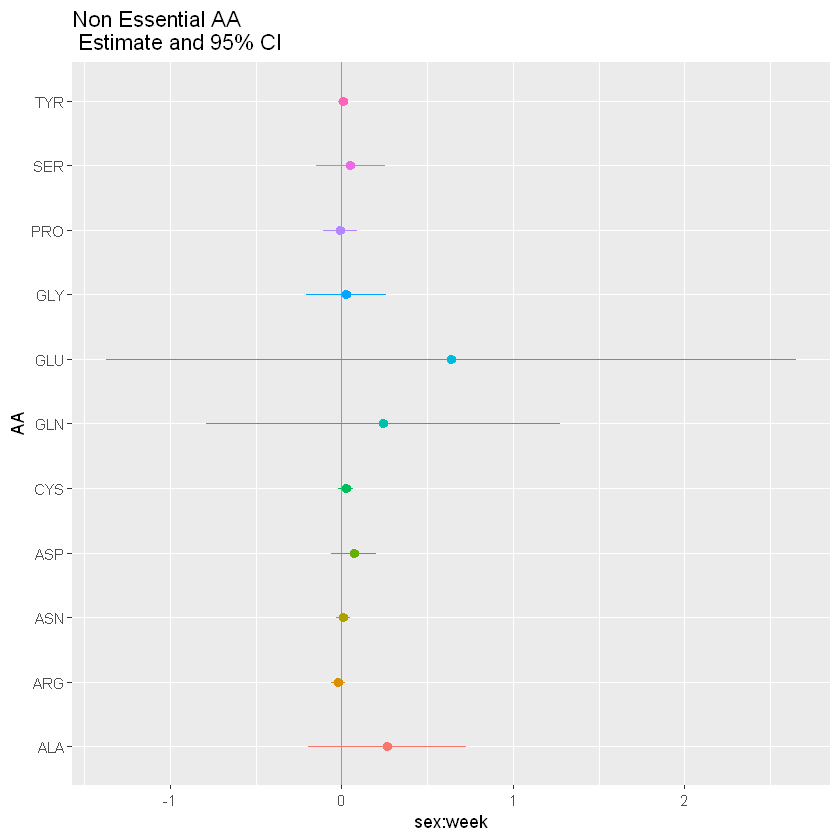

In [61]:
#png(filename="./plots/NEAA_SW_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(swCoef_NE_SW, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab(TeX('sex:week')) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI') 
#dev.off()

## Week and Free AA



In [62]:
meWeek <- function(df){
    
    me <- lmer(level ~ week + (1 | id), data = df)
    
    return(me)
}

In [63]:
me_E_W <- list()
tidy_E_W <- list()

for(i in 1:nAA_E){
    
    me_E_W[[i]] <- meWeek(AA_E_Nested$data[[i]])
    tidy_E_W[[i]] <- tidy(me_E_W[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
   
}

In [64]:
me_NE_W <- list()
tidy_NE_W <- list()

for(i in 1:nAA_NE){
    
    me_NE_W[[i]] <- meWeek(AA_NE_Nested$data[[i]])
    tidy_NE_W[[i]] <- tidy(me_NE_W[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])

}

In [65]:
AA_E_Nested <- AA_E_Nested %>% mutate(model_W = me_E_W, tidy_W = tidy_E_W)
AA_NE_Nested <- AA_NE_Nested %>% mutate(model_W = me_NE_W, tidy_W = tidy_NE_W)

In [66]:
weekCoef_E <- bind_rows(tidy_E_W) %>% filter(grepl("week", term))
weekCoef_NE <- bind_rows(tidy_NE_W) %>% filter(grepl("week", term))

weekCoef_E
weekCoef_NE

effect,term,estimate,std.error,statistic,AA
fixed,week,0.011264837,0.011238746,1.0023216,HIS
fixed,week,0.008828731,0.006902221,1.2791145,ILE
fixed,week,0.042720268,0.016387506,2.6068804,LEU
fixed,week,-0.051481575,0.018869839,-2.7282466,LYS
fixed,week,0.003879168,0.004626100,0.8385397,MET
fixed,week,0.022358680,0.006984564,3.2011563,PHE
fixed,week,0.132238943,0.031849205,4.1520328,THR
fixed,week,-0.001409191,0.001621429,-0.8691042,TRP
fixed,week,0.073534210,0.019237684,3.8224045,VAL


effect,term,estimate,std.error,statistic,AA
fixed,week,-0.024458574,0.011047882,-2.2138699,ARG
fixed,week,0.129219327,0.033362676,3.8731703,ASP
fixed,week,0.567493831,0.115958165,4.8939532,ALA
fixed,week,-0.002238894,0.010021312,-0.2234133,ASN
fixed,week,0.088794524,0.011058085,8.0298282,CYS
fixed,week,0.348180869,0.057169547,6.0903206,GLY
fixed,week,3.462175743,0.509803639,6.7911946,GLU
fixed,week,2.355437507,0.254534735,9.2538942,GLN
fixed,week,-0.047463530,0.023724162,-2.0006410,PRO
fixed,week,0.403780843,0.049903779,8.0911877,SER


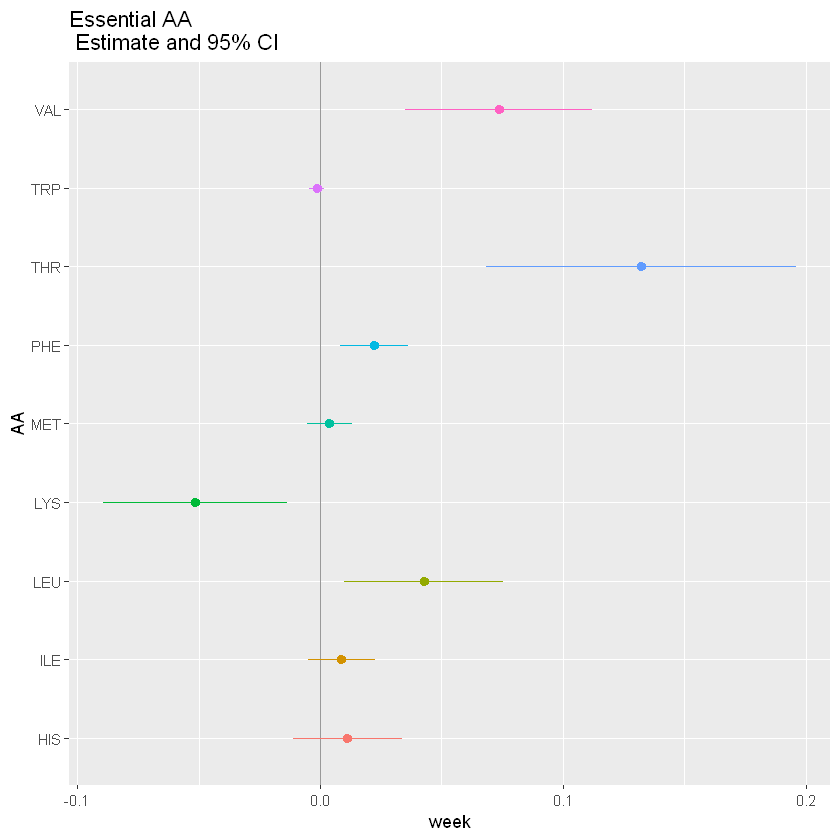

In [67]:
#png(filename="./plots/EAA_W_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(weekCoef_E, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab(TeX('week')) + 
    ggtitle('Essential AA \n Estimate and 95% CI') 
#dev.off()

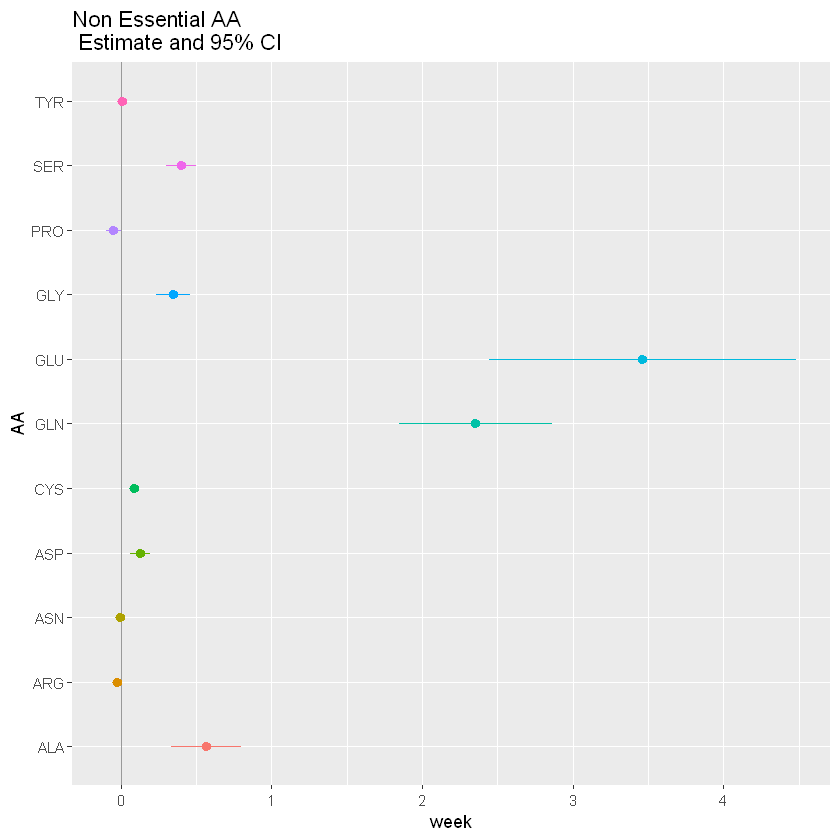

In [68]:
#png(filename="./plots/NEAA_W1_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(weekCoef_NE, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab(TeX('week')) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI') 
#dev.off()

In [69]:
AA_E %>% na.omit() %>% group_by(sex) %>% summarise(n())

sex,n()
girl,12
boy,16
